In [1]:
# Como visualizar datos en Python
# Como hacer varias gráficas en una figura

In [2]:
import numpy as np # libreria que procesa matricez
import pandas as pd # librearia tambien procesa matricez
import netCDF4 as nc
# La liberia mas usada para graficar datos
import matplotlib.pyplot as plt # importamos el módulo pyplot 
from matplotlib.dates import date2num, num2date, datetime

In [3]:
fileobj = nc.Dataset('ERA5_Coarse.nc') # importando el archivo
sst = fileobj['sst'][:] # Leyendo las variables del archivo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin
lon = fileobj['longitude'][:]
lat = fileobj['latitude'][:]
time = fileobj['time']

In [4]:
print(sst.shape)

(76, 180, 360)


In [5]:
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (76,)
filling on, default _FillValue of -2147483647 used

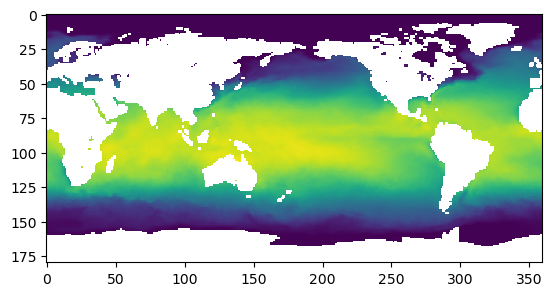

In [6]:
image = plt.imshow(sst[0])

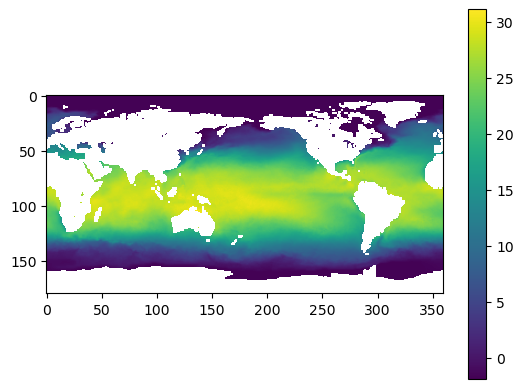

In [8]:
image = plt.imshow(sst[0]) # imshow es una manera rápida de ver matriz 2D
plt.colorbar() # vean la libreria cmocean
# plt.show()

In [9]:
# aqui graficamos el tiempo 0 todos los renglonesn(latitud) y todas las columnas longitud

In [10]:
fileobj['sst']

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, latitude, longitude)
    _FillValue: -32767
    units: K
    long_name: Sea surface temperature
    add_offset: 289.4649014722902
    scale_factor: 0.0006169772945977599
    missing_value: -32767
unlimited dimensions: 
current shape = (76, 180, 360)
filling on

In [11]:
fileobj['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (76,)
filling on, default _FillValue of -2147483647 used

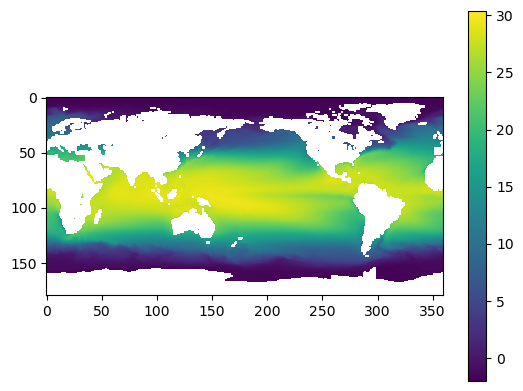

In [12]:
plt.imshow(sst.mean(0)) # la dimensión 0 es el tiempo
plt.colorbar()

In [13]:
# que podemos decir de esta gráfica? Cuantos años

In [14]:
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (76,)
filling on, default _FillValue of -2147483647 used

In [15]:
var = datetime.datetime.strptime('1900-01-01 00:00:00', '%Y-%d-%m %H:%M:%S')

In [16]:
ref = date2num(var)
time = fileobj['time'][:] / 24 + ref
# xarray
print(num2date(time[0]))
print(num2date(time[-1]))

1959-01-01 00:00:00+00:00
2021-07-01 00:00:00+00:00


In [17]:
print(num2date(time[0]))
print(num2date(time[1]))

1959-01-01 00:00:00+00:00
1959-11-01 00:00:00+00:00


In [18]:
# Ahora veamos el promedio de temperatura sobre todas las longitudes y todo el tiempo)
# Podemos en un mismo renglón calcular el promedio sobre tiempo y longitud
sst_m_lon = np.mean(sst, axis=2).mean(axis=0)
sst_m_lon.shape

(180,)

In [19]:
print(lat.shape)

(180,)


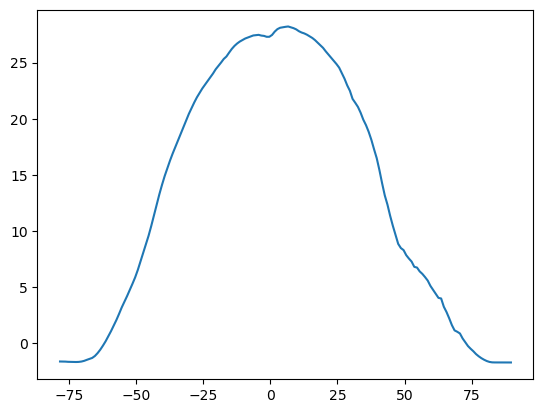

In [20]:
plt.plot(lat, sst_m_lon)

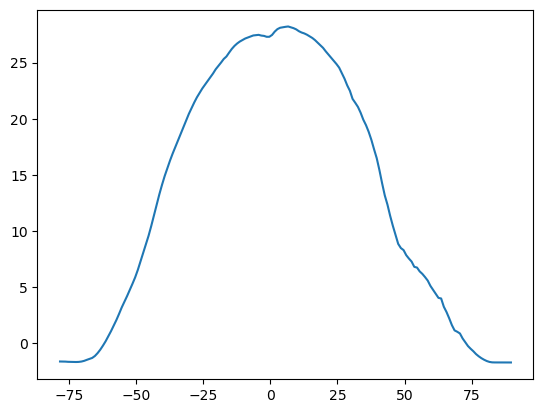

In [21]:
plt.plot(lat, sst_m_lon) # que podemos decir al respecto

Text(0, 0.5, 'Latitud')

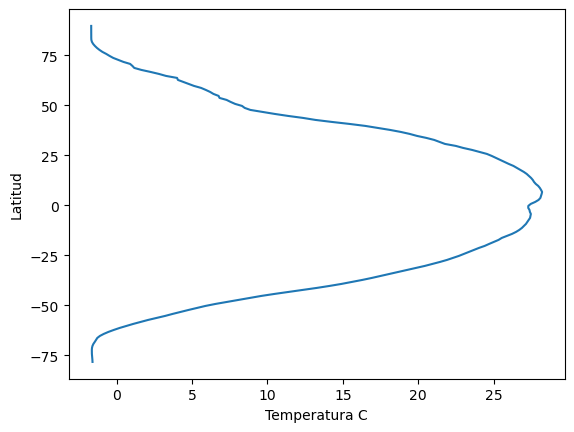

In [22]:
plt.plot(sst_m_lon, lat) # que podemos decir al respecto
plt.xlabel('Temperatura C')
plt.ylabel('Latitud')

In [23]:
sst_mean = sst.mean(axis=0) # promedio en dimensión 0 que es el tiempo
print(sst_mean.shape)
print(lat.shape)
print(lon.shape)

(180, 360)
(180,)
(360,)


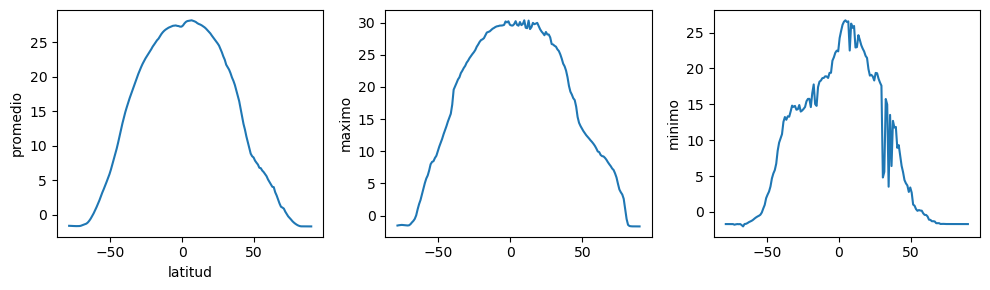

In [24]:
fig = plt.figure(figsize=(10.0, 3.0)) # fig es el nombre de mi figura

# 1 renglon y 3 columnas
axes1 = fig.add_subplot(1, 3, 1) # graficas dentro de la figure posicion 1
axes2 = fig.add_subplot(1, 3, 2) # posicion 2
axes3 = fig.add_subplot(1, 3, 3) # posicion 3

axes1.set_ylabel('promedio')
axes1.set_xlabel('latitud')
axes1.plot(lat, np.mean(sst_mean, axis=1))

axes2.set_ylabel('maximo')
axes2.plot(lat, np.max(sst_mean, axis=1))

axes3.set_ylabel('minimo')
axes3.plot(lat, np.min(sst_mean, axis=1))

fig.tight_layout()# grafica a la figura mas bonita

plt.savefig('sst.pdf') # se utilizan comillas y se puede utilizar diferentes formato
plt.show()

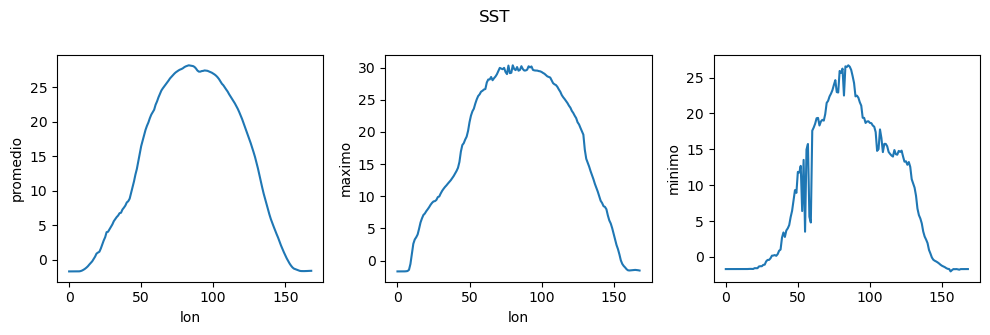

In [25]:
fig = plt.figure(figsize=(10.0, 3.0)) # labels y axis

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('promedio')
axes1.plot(np.mean(sst_mean, axis=1))
axes1.set_xlabel('lon')


axes2.set_ylabel('maximo')
axes2.plot(np.max(sst_mean, axis=1))
axes2.set_xlabel('lon')


axes3.set_ylabel('minimo')
axes3.plot(np.min(sst_mean, axis=1))
axes1.set_xlabel('lon')

fig.tight_layout()
plt.suptitle('SST', y=1.1)
plt.savefig('sst.png')
plt.show()